In [ ]:
# Setting up Kaggle API and downloading dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:07<00:00, 90.3MB/s]
100% 812M/812M [00:07<00:00, 109MB/s] 


In [ ]:
import zipfile
# Unzipping the dataset
with zipfile.ZipFile("/content/dogs-vs-cats.zip", "r") as zip_ref:
    zip_ref.extractall("/content")
with zipfile.ZipFile("/content/train.zip", "r") as zip_ref:
    zip_ref.extractall("/content")
with zipfile.ZipFile("/content/test1.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
# Creating directories for cats and dogs
!mkdir /content/train/dogs
!mkdir /content/train/cats
!mv /content/train/dog* /content/train/dogs
!mv /content/train/cat* /content/train/cats

mv: cannot move '/content/train/dogs' to a subdirectory of itself, '/content/train/dogs/dogs'
mv: cannot move '/content/train/cats' to a subdirectory of itself, '/content/train/cats/cats'


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import matplotlib.pyplot as plt
import os
import random

In [ ]:
# Loading and preprocessing the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 25000 files belonging to 2 classes.


In [ ]:
# Data augmentation
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),
    ]
)

In [ ]:
def process(image, label):
    image = data_augmentation(image)
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)

In [ ]:
# Model definition
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=2, padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2, padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Conv2D(128, kernel_size=(3, 3), strides=2, padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Model compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Model training
history = model.fit(train_ds, epochs=2)

Epoch 1/2
782/782 [==============================] - 607s 768ms/step - loss: 0.6651 - accuracy: 0.5857
Epoch 2/2
782/782 [==============================] - 602s 770ms/step - loss: 0.5983 - accuracy: 0.6820


In [ ]:
def predict_random_image(test_dir):
    test_images = os.listdir(test_dir)
    if not test_images:
        print("No images found in the test directory.")
        return

    # Randomly selecting an image
    random_img_path = os.path.join(test_dir, random.choice(test_images))
    test_img = cv2.imread(random_img_path)
    if test_img is None:
        print(f"Error: Could not read image from {random_img_path}. Check if the path is correct and the image file is valid.")
        return

    # Preprocessing the image
    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3))
    test_input = test_input / 255.0

    # Displaying the image
    plt.imshow(test_img)
    plt.show()

    # Predicting using the model
    svm_predict = model.predict(test_input)
    if svm_predict[0] < 0.5:
        print("It's a dog.")
    else:
        print("It's a cat.")

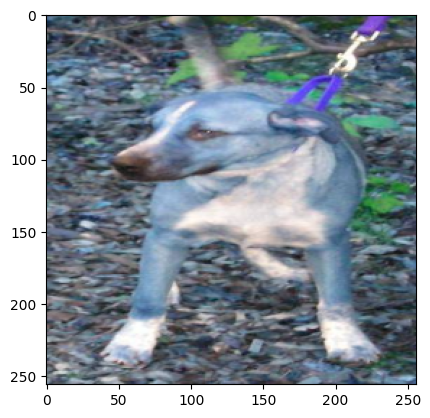

1/1 [==============================] - 0s 41ms/step
It's a dog.


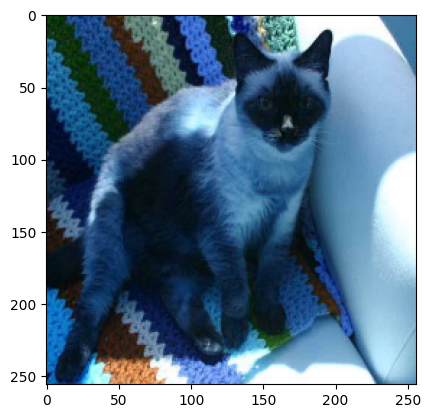

1/1 [==============================] - 0s 31ms/step
It's a cat.


In [ ]:
# Testing with random images
test_dir = "/content/test1"
predict_random_image(test_dir)
predict_random_image(test_dir)